<a href="https://colab.research.google.com/github/hazmicokro/Data-Literate-Bootcamp-2020/blob/main/weekly_task_5_M_Hazmi_Cokro_Mandiri_Linear_Regression_%7C_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M Hazmi Cokro M / @hazmicokro / Week 5 / Linear Regression dan Naive Bayes**

# Quiz Explore

1. Jelaskan sesuai pemahaman kalian pengertian dari pertanyaan dibawah ini, jelaskan menggunakan docstring
    - Machine Learning
    - Supervised Learning
2. Lakukan eksplorasi pada dataset `data_multiple.csv` menggunakan metode Linear Regression! Lalu jelaskan menggunakan docstring
3. Lakukan ekplorasi menggunakan dataset yang sudah disediakan oleh library scikit-learn dan terapkan metode Naive Bayes! Jelaskan menggunakan docstring

Selamat mengerjakan

#**[1] Machine Learning | Supervised Learning**

In [ ]:
def MLSL(MLSL1): 
    '''
    ------------------------------ Machine Learning ---------------------------------
    Machine learning merupakan cabang dari artificial intelligence (AI).
    ML menggunakan metode statistika untuk membuat komputer dapat mempelajari pola pada data tanpa perlu diprogram secara eksplisit.
    Deep learning salah satu cabang machine learning dengan algoritma jaringan syaraf tiruan yang dapat belajar 
    dan beradaptasi terhadap sejumlah besar data.
    Example : Deep Learning (CNN, ANN, dkk)
    ------------------------------ ------------------------ ---------------------------------

    ------------------------------ Supervised Learning ---------------------------------
    Supervised learning salah satu kategori machine learning yang menyertakan solusi yang diinginkan.
    Dataset yang digunakan telah memiliki label dan algoritma kemudian mempelajari pola dari pasangan data dan label tersebut. 
    Algoritma supervised learning mudah dipahami dan performa akurasinya pun mudah diukur. 
    Example : QnA system yang jawabannya udah disediakan oleh user/programmer.
    ------------------------------ ------------------------ ---------------------------------

    Reference : Dicoding - Belajar Machine Learning untuk Pemula
    '''
    return MLSL1

print(MLSL.__doc__) 


    ------------------------------ Machine Learning ---------------------------------
    Machine learning merupakan cabang dari artificial intelligence (AI).
    ML menggunakan metode statistika untuk membuat komputer dapat mempelajari pola pada data tanpa perlu diprogram secara eksplisit.
    Deep learning salah satu cabang machine learning dengan algoritma jaringan syaraf tiruan yang dapat belajar 
    dan beradaptasi terhadap sejumlah besar data.
    Example : Deep Learning (CNN, ANN, dkk)
    ------------------------------ ------------------------ ---------------------------------

    ------------------------------ Supervised Learning ---------------------------------
    Supervised learning salah satu kategori machine learning yang menyertakan solusi yang diinginkan.
    Dataset yang digunakan telah memiliki label dan algoritma kemudian mempelajari pola dari pasangan data dan label tersebut. 
    Algoritma supervised learning mudah dipahami dan performa akurasinya pun mudah diu

#**[2] Linear Regression | data_multiple.csv**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_multiple.csv to data_multiple.csv


In [ ]:
data = pd.read_csv('data_multiple.csv')
data.head(7)

,Nama,Tugas,Quiz,UTS,UAS,Absensi,NA
0,Adi,75,35,63,85,98,72.90
1,Suci,48,53,74,49,78,56.15
2,Tino,55,73,81,76,66,71.20
3,Andi,49,27,66,53,89,51.90
4,Rina,40,44,67,54,60,50.80
5,Deny,23,38,70,48,99,51.25
6,Lina,59,39,50,52,66,53.50


In [ ]:
print('Rata Tugas : ',data['Tugas'].mean(),
        '\nRata Quiz : ',data['Quiz'].mean(),
        '\nRata UTS :',data['UTS'].mean(),
        '\nRata UAS : ',data['UAS'].mean(),
        '\nRata Absensi : ',data['Absensi'].mean())

Rata Tugas :  54.15 
Rata Quiz :  47.05 
Rata UTS : 68.55 
Rata UAS :  63.5 
Rata Absensi :  79.45


In [ ]:
data.isnull().sum()

Nama       0
Tugas      0
Quiz       0
UTS        0
UAS        0
Absensi    0
NA         0
dtype: int64

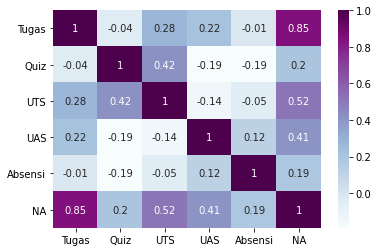

In [ ]:
'''
Pada Matriks Korelasi menunjukkan nilai positif tinggi (+0.85) didapatkan oleh
Value Tugas dengan NA, dimana menunjukkan korelasi berhubungan hampir sempurna
Maka dari itu pada implementasi LR, 
Menggunakan Tugas sebagai value X dan NA sebagai value Y
'''
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap="BuPu")

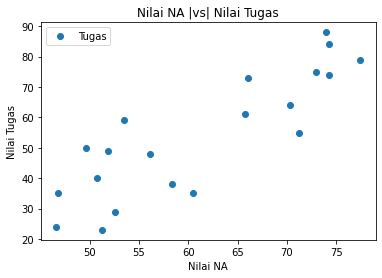

In [ ]:
data.plot(x='NA', y='Tugas', style='o')
plt.title('Nilai NA |vs| Nilai Tugas')
plt.xlabel('Nilai NA')
plt.ylabel('Nilai Tugas')
plt.show()

In [ ]:
'''
Split Data Train 70%
'''

data_train = data[:14]

X_train = data_train['Tugas'].values.reshape(-1, 1)
Y_train = data_train['NA'].values.reshape(-1, 1)
data_train.tail(3)

,Nama,Tugas,Quiz,UTS,UAS,Absensi,NA
11,Rony,35,64,54,59,53,46.75
12,Dandi,84,34,71,74,88,74.30
13,Azka,50,27,47,66,75,49.65


In [ ]:
'''
Split Data Test 30%
'''

data_test = data[14:]

X_test = data_test['Tugas'].values.reshape(-1, 1)
Y_test = data_test['NA'].values.reshape(-1, 1)
data_test.head(6)

,Nama,Tugas,Quiz,UTS,UAS,Absensi,NA
14,Reno,61,60,78,48,72,65.75
15,Sandi,35,45,74,69,99,60.50
16,Linda,64,73,73,59,86,70.35
17,Sinta,29,39,47,82,98,52.60
18,Marni,88,53,88,46,84,73.95
19,Fandi,38,57,71,71,91,58.35


In [ ]:
'''
Implementasi Linear Regression 
Pelatihan data / train (fit) data
Menghitung nilai intercept dan Coefficient
'''
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Intercept : ", regressor.intercept_)
print("Coefficient : ", regressor.coef_)

y_pred = regressor.predict(X_test)
print("\nY Pred :\n",y_pred)

Intercept :  [32.21326642]
Coefficient :  [[0.51017483]]

Y Pred :
 [[63.3339311 ]
 [50.0693855 ]
 [64.8644556 ]
 [47.00833652]
 [77.10865154]
 [51.59990999]]


In [ ]:
'''
Ground Truth dan Prediction di lakukan flatten menjadi 1 dimensi
'''
df_test = pd.DataFrame({'Ground Truth': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df_test

,Ground Truth,Predicted
0,65.75,63.333931
1,60.50,50.069386
2,70.35,64.864456
3,52.60,47.008337
4,73.95,77.108652
5,58.35,51.599910


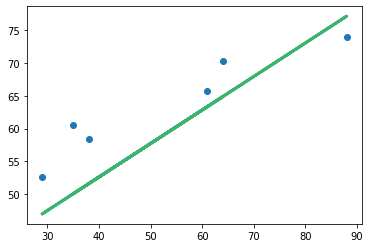

In [ ]:
'''
Plot Hasil prediksi LR
'''
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, color='mediumseagreen', linewidth=3)
plt.show()

In [ ]:
'''
Hasil RMSE masih belum mencapai dibawah <10%
'''

from sklearn import metrics

print(f'MSE = {metrics.mean_squared_error(Y_test, y_pred)}')
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(Y_test, y_pred))}')

MSE = 38.58896671722439
RMSE = 6.212001828494933


#**[3] Naive Bayes | Breast Cancer**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
'''
Load Dataset dan Splitting daset 
Komposisi Train dan Test
'''

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)

print('X_Train :',X_train.shape,
        '\nX_Test :',X_test.shape,
        '\nY_Train :',y_train.shape,
        '\nY_Test :',y_test.shape)

X_Train : (426, 30) 
X_Test : (143, 30) 
Y_Train : (426,) 
Y_Test : (143,)


In [ ]:
def NB(nb1): 
    '''
    ------------------------------ Tahapan Naive Bayes ---------------------------------
    1. Deklarasikan Fungsi Gaussian Naive Bayes dari Library Sklearn
    2. Kemudian melatih model dengan data train
    3. Setelah itu dihitung nilai score menggunakan algoritma naive bayes
    4. Hasil output akurasi dicetak dalam persentase
    ------------------------------ ------------------------------  ---------------------------------
    '''
    naivebayes = GaussianNB()
    naivebayes.fit(X_train, y_train)

    acc_train = naivebayes.score(X_train, y_train)
    acc_test = naivebayes.score(X_test, y_test)

    y_pred = naivebayes.predict(X_test)

    print('[1] Classifcation Report')
    print('--------------------------------')
    print(classification_report(y_test, y_pred))
    print('[2] Confusion Matrix')
    print('--------------------------------')
    print(confusion_matrix(y_test, y_pred))
    print(' ')

    print('[3] Evaluasi Akurasi')
    print('--------------------------------')
    print("Akurasi Training: {0:.0f}%".format(acc_train* 100))
    print("Akurasi Testing : {0:.0f}%".format(acc_test* 100))

    return nb1 

print(NB.__doc__) 
NB('----------------------------')


    ------------------------------ Tahapan Naive Bayes ---------------------------------
    1. Deklarasikan Fungsi Gaussian Naive Bayes dari Library Sklearn
    2. Kemudian melatih model dengan data train
    3. Setelah itu dihitung nilai score menggunakan algoritma naive bayes
    4. Hasil output akurasi dicetak dalam persentase
    ------------------------------ ------------------------------  ---------------------------------
    
[1] Classifcation Report
--------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

[2] Confusion Matrix
--------------------------------
[[50  3]
 [ 2 88]]
 
[3] Evaluasi Akurasi
--------------------------------
Akurasi Training: 93%
Akurasi Testing : 97%


'----------------------------'